In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#open tsv or csv tab delimited file
#https://stackoverflow.com/questions/48583002/how-to-open-a-tsv-file-in-jupyter-jupyter-notebook-tried-suggestions-but-it-d?rq=1
#df = pd.read_csv('/Users/evarubin/Dev/thinkful/data/article_ephys_metadata_curated.csv', sep='\t')

#set data file
df = pd.read_csv('/Users/evarubin/Dev/thinkful/data/35478-0001-Data.csv', sep='\t')

# Show data for selected columns only
df[['SPANENG', 'WRKSTAT', 'HRS1', 'EDUC', 'PAEDUC', 'MAEDUC', 'PADEG', 'DIPGED', 'RACE', 'RINCOME', 'NATEDUC', 'NATEDUCY', 'TRUST', 'CONBUS']]


,SPANENG,WRKSTAT,HRS1,EDUC,PAEDUC,MAEDUC,PADEG,DIPGED,RACE,RINCOME,NATEDUC,NATEDUCY,TRUST,CONBUS
0,1,2,15,16,16,16,4,1,1,0,0,1,0,0
1,1,2,30,12,97,12,7,1,1,0,0,1,2,1
2,1,1,60,12,97,15,7,1,3,12,1,0,1,2
3,1,8,-1,13,18,16,4,1,1,0,0,1,1,1
4,1,5,-1,16,98,12,0,1,2,0,0,1,2,3
5,1,8,-1,19,14,12,2,1,1,0,2,0,0,0
6,1,7,-1,15,14,12,2,1,1,0,1,0,2,3
7,1,7,-1,11,97,11,7,0,3,0,0,2,2,2
8,1,7,-1,9,98,12,8,0,2,0,1,0,0,0
9,1,1,40,17,14,12,2,1,1,12,1,0,3,3


In [7]:
#Create a groupby dataframe that groups mean hours worked by TRUST

#Mean number of hours worked based on perceived trustability of others 1 = can trust; 2 = can't trust
trust_hours_df = df['HRS1'].groupby(df['TRUST']).mean()


In [12]:
trust_hours_df

TRUST
0    23.815621
1    25.680141
2    23.373789
3    24.459459
8    15.000000
Name: HRS1, dtype: float64

In [14]:
#trust = 1 or 2 only - #the pipe symbol may just be pandas specific, it's not "or" in python
trust_hours = trust_hours_df.loc[(trust_hours_df.index == 1) | (trust_hours_df.index == 2)]

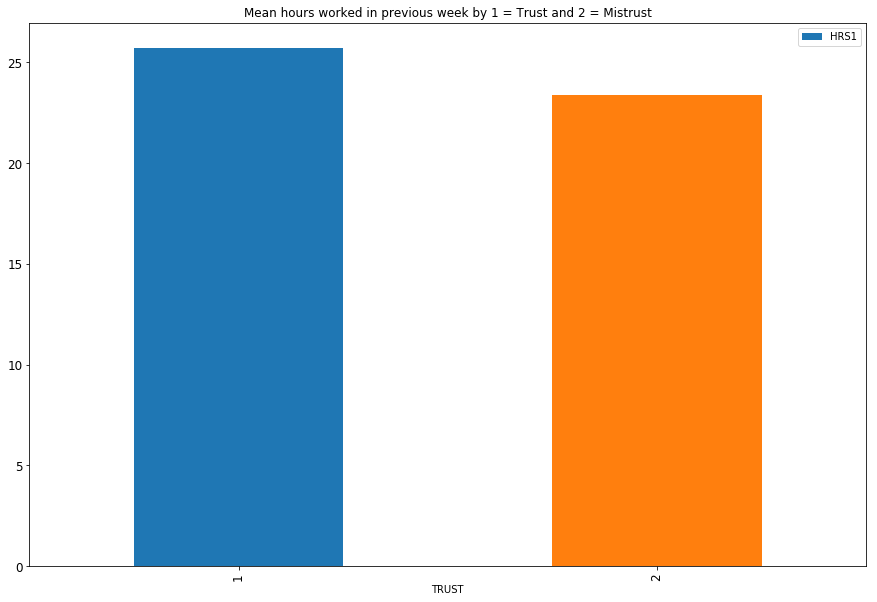

In [15]:
#visualize # of hours worked by trust = 1 vs. mistrust = 2
trust_hours.plot(
    kind='bar',
    title ="Mean hours worked in previous week by 1 = Trust and 2 = Mistrust",
    figsize=(15, 10),
    legend=True,
    fontsize=12)

In [17]:
#Create a groupby variable that groups mean education level of mother by TRUST

#Mean level of mother's ed based on perceived trustability of others 1 = can trust; 2 = can't trust
trust_maeduc_df = df['MAEDUC'].groupby(df['TRUST']).mean()


In [18]:
trust_maeduc_df

TRUST
0    19.857875
1    18.887522
2    20.710352
3    18.067568
8    34.727273
Name: MAEDUC, dtype: float64

In [20]:
#trust = 1 or 2 only - the pipe symbol may just be pandas specific, it is not an "or" operator in python
trust_maeduc = trust_maeduc_df.loc[(trust_maeduc_df.index == 1) | (trust_maeduc_df.index == 2)]

trust_maeduc

TRUST
1    18.887522
2    20.710352
Name: MAEDUC, dtype: float64

Text(0,0.5,"Mother's grade level")

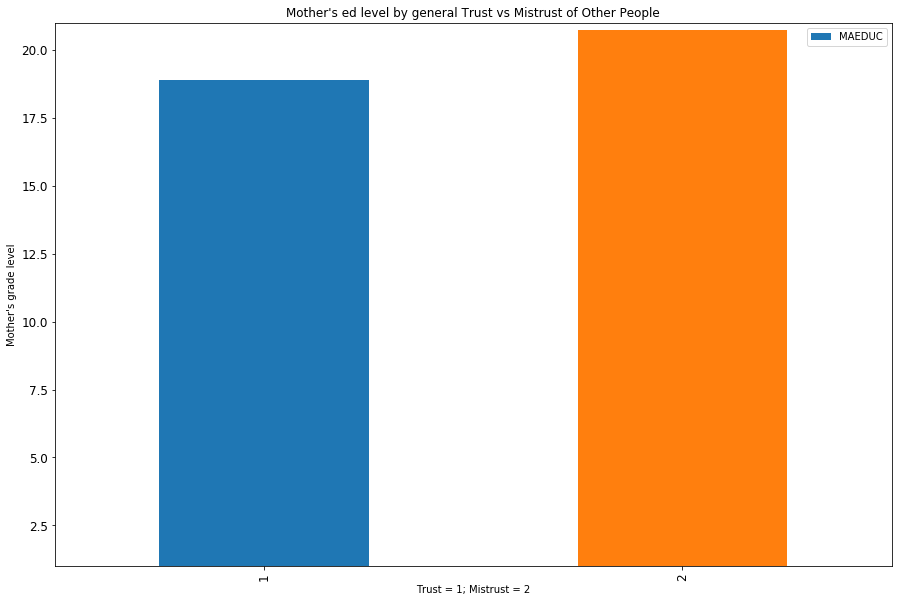

In [66]:
#visualize mean mother's education level by trust = 1 vs. mistrust = 2
trust_maeduc.plot(
    kind='bar',
    title ="Mother's ed level by general Trust vs Mistrust of Other People",
    figsize=(15, 10),
    legend=True,
    fontsize=12)
plt.ylim([1, 21])
plt.xlabel('Trust = 1; Mistrust = 2')
plt.ylabel('Mother\'s grade level')


In [32]:
#mother's education = 12, where true --> get avg income level
df['RINCOME'].groupby(df['MAEDUC'] == 12)

In [33]:
mothers_education = df.loc[df['MAEDUC'] == 12]

In [34]:
mothers_education['RINCOME'].mean()

7.8

In [36]:
income_by_maeduc =  df['RINCOME'].groupby(df['MAEDUC']).mean()
income_by_maeduc

MAEDUC
0     10.132653
1      7.800000
2      9.411765
3      9.766667
4      7.305556
5      4.953125
6      7.626582
7      4.154930
8      6.158784
9      6.234375
10     6.463158
11     6.920904
12     7.985440
13     8.370787
14     8.396373
15     7.259740
16     8.774123
17     9.277778
18     8.187500
19     9.315789
20     6.549020
97     6.945455
98     5.750000
99     6.400000
Name: RINCOME, dtype: float64

In [37]:
#select only actual grades for chart
income_by_mothers_ed = income_by_maeduc.iloc[1:21]

Text(0,0.5,'Mean Income Level')

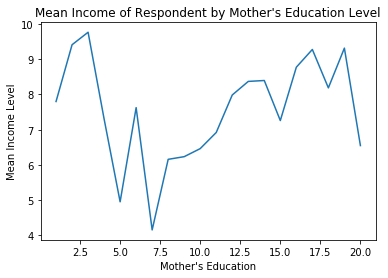

In [45]:
#visualize income by mother's education
income_by_mothers_ed.plot()
plt.title('Mean Income of Respondent by Mother\'s Education Level')
plt.xlabel('Mother\'s Education')
plt.ylabel('Mean Income Level')

In [59]:
income_by_paeduc =  df['RINCOME'].groupby(df['PAEDUC']).mean()
income_by_paeduc

PAEDUC
0      8.573034
1      4.363636
2      5.413793
3      9.825000
4      4.220000
5      5.090909
6      8.178571
7      6.676923
8      5.909357
9      7.132743
10     6.691176
11     7.465347
12     7.979201
13     7.178571
14     7.851852
15    11.244898
16     9.303493
17     5.030303
18     8.208333
19     8.972222
20    10.016667
97     7.103321
98     6.809524
99     7.166667
Name: RINCOME, dtype: float64

In [61]:
#select only actual grades for chart
income_by_fathers_ed = income_by_paeduc.iloc[1:21]

Text(0,0.5,"Respondent's Mean Income Level")

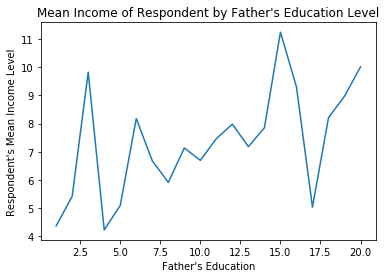

In [62]:
#visualize income by mother's education
income_by_fathers_ed.plot()
plt.title('Mean Income of Respondent by Father\'s Education Level')
plt.xlabel('Father\'s Education')
plt.ylabel('Respondent\'s Mean Income Level')

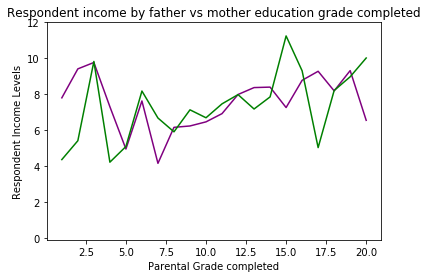

In [67]:
plt.plot(income_by_mothers_ed, color='purple')
plt.plot(income_by_fathers_ed, color='green')
plt.ylim([-0.1, 12])
plt.xlabel('Parental Grade completed')
plt.ylabel('Respondent Income Levels')
plt.title('Respondent income by father vs mother education grade completed')
plt.show()

In [53]:
# Group mean respondent education level by values 1-20 for father's grade level completed
educ_by_maeduc = df['EDUC'].groupby(df['MAEDUC']).mean()
ma_education_levels_1_20 = educ_by_maeduc.iloc[1:21]
ma_education_levels_1_20

MAEDUC
1      8.500000
2     10.000000
3     11.183333
4     11.111111
5     12.140625
6     12.018987
7     12.436620
8     12.868243
9     12.703125
10    13.094737
11    12.728814
12    14.008736
13    14.455056
14    14.717617
15    15.077922
16    15.508772
17    16.638889
18    16.226562
19    16.105263
20    15.823529
Name: EDUC, dtype: float64

Text(0,0.5,"Mean Level of Respondent's Education")

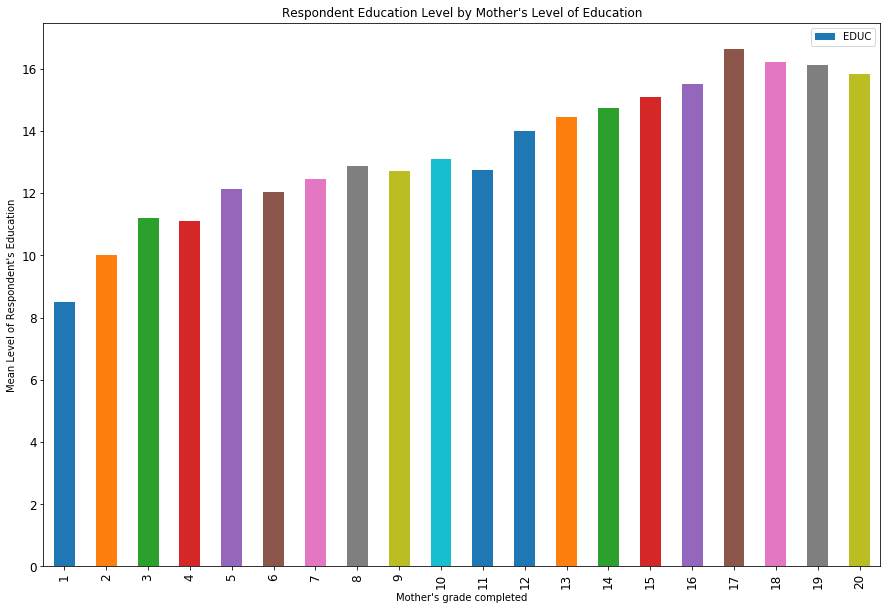

In [54]:
ma_education_levels_1_20.plot(
    kind='bar',
    title ="Respondent Education Level by Mother's Level of Education",
    figsize=(15, 10),
    legend=True,
    fontsize=12)
plt.xlabel('Mother\'s grade completed')
plt.ylabel('Mean Level of Respondent\'s Education')

In [56]:
# Group mean respondent education level by values 1-20 for father's grade level completed
educ_by_paeduc = df['EDUC'].groupby(df['PAEDUC']).mean()
pa_education_levels_1_20 = educ_by_paeduc.iloc[1:21]
pa_education_levels_1_20

PAEDUC
1      9.181818
2     11.344828
3     12.075000
4     11.920000
5     12.469697
6     11.771429
7     12.738462
8     13.476608
9     13.221239
10    13.448529
11    13.000000
12    14.074875
13    14.935714
14    14.884774
15    14.877551
16    15.486900
17    16.242424
18    15.750000
19    17.166667
20    16.708333
Name: EDUC, dtype: float64

Text(0,0.5,"Mean Level of Respondent's Education")

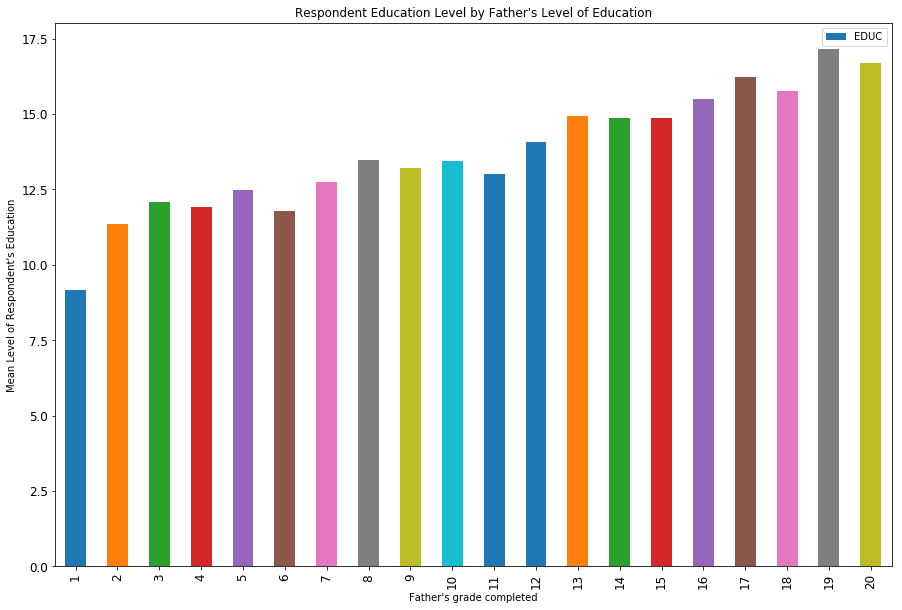

In [57]:
pa_education_levels_1_20.plot(
    kind='bar',
    title ="Respondent Education Level by Father's Level of Education",
    figsize=(15, 10),
    legend=True,
    fontsize=12)
plt.xlabel('Father\'s grade completed')
plt.ylabel('Mean Level of Respondent\'s Education')


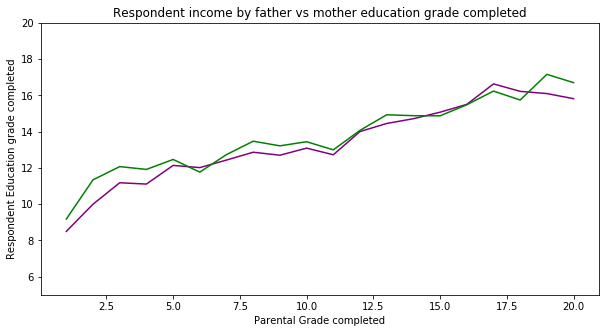

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(ma_education_levels_1_20, color='purple')
plt.plot(pa_education_levels_1_20, color='green')
plt.ylim([5, 20])
plt.xlabel('Parental Grade completed')
plt.ylabel('Respondent Education grade completed')
plt.title('Respondent income by father vs mother education grade completed')
plt.show()